In [1]:
import scanpy as sc
import infercnvpy as cnv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [9]:
adata_normal_cancer = sc.read('/home/datadisk1/zlg/singlecell/EMT/PRJNA803321_2022cell/adata_normal_cancer.h5ad')
adata_normal_cancer

AnnData object with n_obs × n_vars = 58443 × 25954
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name'
    obsm: 'X_scVI', 'X_umap'

In [117]:
adata_normal_cancer.uns['Cluster-Name_colors']

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728', '#aa40fc', '#8c564b',
       '#e377c2', '#b5bd61', '#17becf', '#aec7e8', '#ffbb78', '#98df8a',
       '#ff9896', '#c5b0d5', '#c49c94', '#f7b6d2'], dtype=object)

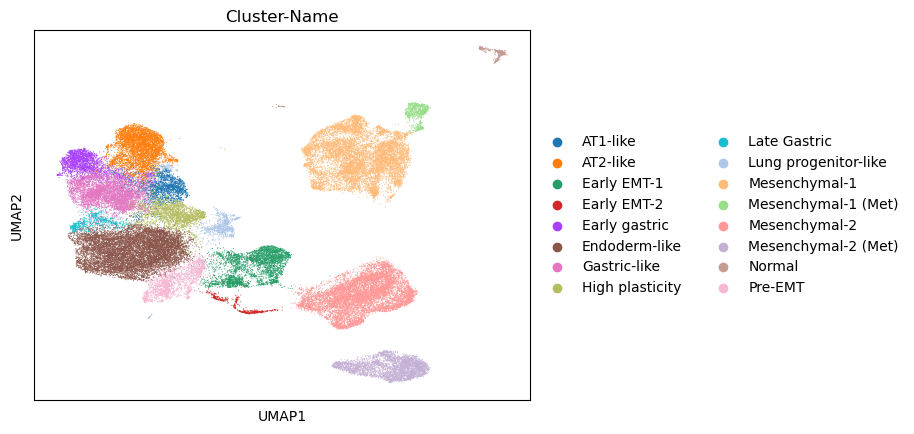

In [50]:
sc.pl.umap(adata_normal_cancer, color="Cluster-Name",vmax=None, vmin=None, save='celltype_normal_cancer.pdf')

In [11]:
gene_info = adata.var.loc[:, ["Accession", "chromosome", "start", "end"]]
gene_info

,Accession,chromosome,start,end
Gene,,,,
AC125149.3,ENSMUSG00000079800,chrGL456210.1,9124,58882
AC125149.5,ENSMUSG00000095092,chrGL456210.1,108390,110303
AC125149.2,ENSMUSG00000079794,chrGL456210.1,135395,136519
AC125149.1,ENSMUSG00000079192,chrGL456210.1,123792,124928
AC125149.4,ENSMUSG00000094799,chrGL456210.1,147792,149707
...,...,...,...,...
Gm28672,ENSMUSG00000100492,chrY,89222067,89225296
Gm28670,ENSMUSG00000099982,chrY,89391528,89394761
Gm29504,ENSMUSG00000100533,chrY,90275224,90277501


In [12]:
adata_normal_cancer_info = gene_info.loc[gene_info.index.isin(adata_normal_cancer.var.index)]
adata_normal_cancer_info

,Accession,chromosome,start,end
Gene,,,,
AC125149.3,ENSMUSG00000079800,chrGL456210.1,9124,58882
AC125149.5,ENSMUSG00000095092,chrGL456210.1,108390,110303
AC125149.2,ENSMUSG00000079794,chrGL456210.1,135395,136519
AC125149.1,ENSMUSG00000079192,chrGL456210.1,123792,124928
AC125149.4,ENSMUSG00000094799,chrGL456210.1,147792,149707
...,...,...,...,...
Gm21294,ENSMUSG00000102045,chrY,89052806,89079015
Gm28672,ENSMUSG00000100492,chrY,89222067,89225296
Gm28670,ENSMUSG00000099982,chrY,89391528,89394761


In [13]:
adata_normal_cancer_info = adata_normal_cancer_info.reindex(adata_normal_cancer.var.index)
adata_normal_cancer_info

,Accession,chromosome,start,end
Xkr4,ENSMUSG00000051951,chr1,3205901,3671498
Gm1992,ENSMUSG00000089699,chr1,3466587,3513553
Gm37381,ENSMUSG00000102343,chr1,3905739,3986215
Rp1,ENSMUSG00000025900,chr1,3999557,4409241
Sox17,ENSMUSG00000025902,chr1,4490931,4497354
...,...,...,...,...
AC234645.1,ENSMUSG00000095019,chrJH584303.1,81607,82689
AC168977.2,ENSMUSG00000094915,chrGL456212.1,31967,34932
AC168977.1,ENSMUSG00000079808,chrGL456212.1,128555,150452
Vmn2r122,ENSMUSG00000096730,chrJH584292.1,3536,11935


In [14]:
adata_normal_cancer.var = adata_normal_cancer.var.join(adata_normal_cancer_info, how='left')
adata_normal_cancer.var

,Accession,chromosome,start,end
Xkr4,ENSMUSG00000051951,chr1,3205901,3671498
Gm1992,ENSMUSG00000089699,chr1,3466587,3513553
Gm37381,ENSMUSG00000102343,chr1,3905739,3986215
Rp1,ENSMUSG00000025900,chr1,3999557,4409241
Sox17,ENSMUSG00000025902,chr1,4490931,4497354
...,...,...,...,...
AC234645.1,ENSMUSG00000095019,chrJH584303.1,81607,82689
AC168977.2,ENSMUSG00000094915,chrGL456212.1,31967,34932
AC168977.1,ENSMUSG00000079808,chrGL456212.1,128555,150452
Vmn2r122,ENSMUSG00000096730,chrJH584292.1,3536,11935


In [15]:
adata_normal_cancer

AnnData object with n_obs × n_vars = 58443 × 25954
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name'
    var: 'Accession', 'chromosome', 'start', 'end'
    obsm: 'X_scVI', 'X_umap'

In [17]:
cnv.tl.infercnv(
    adata_normal_cancer,
    reference_key="Cluster-Name",
    reference_cat=["Normal",],
    window_size=250,
    exclude_chromosomes=('chrGL456210.1', 'chrGL456211.1', 'chrGL456212.1', 'chrGL456216.1', 'chrGL456219.1', 'chrGL456221.1',
                         'chrGL456233.1', 'chrGL456350.1', 'chrGL456354.1', 'chrJH584292.1', 'chrJH584293.1', 'chrJH584294.1', 'chrJH584295.1',
                         'chrJH584296.1', 'chrJH584297.1', 'chrJH584298.1', 'chrJH584299.1', 'chrJH584303.1', 'chrJH584304.1'),
    n_jobs=20,
    calculate_gene_values=True)

  0%|          | 0/12 [00:00<?, ?it/s]

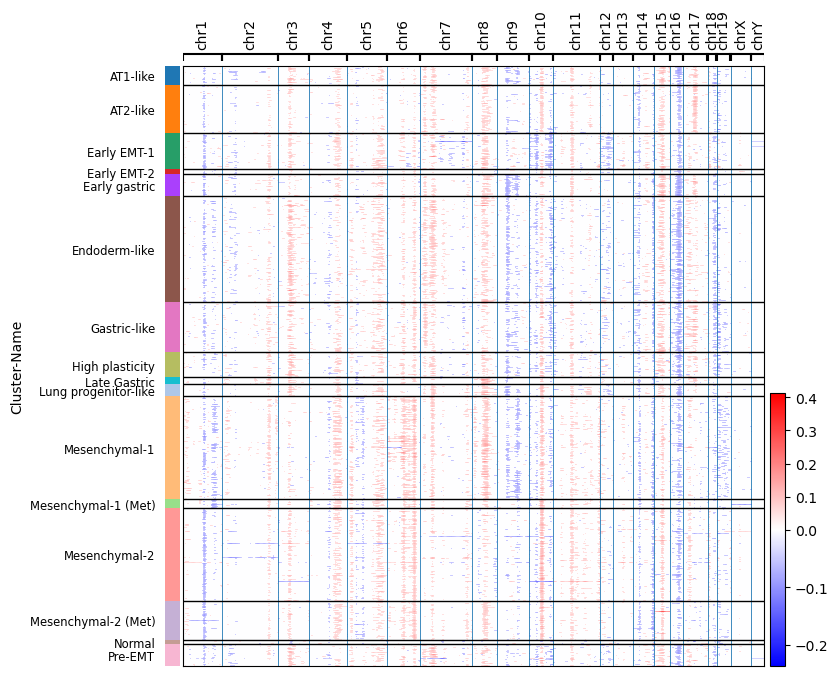

In [107]:
cnv.pl.chromosome_heatmap(adata_normal_cancer, groupby="Cluster-Name", figsize=(8,8), save='chromosome_XY_heatmap_normal_cancer1.svg')

In [27]:
from anndata import AnnData
from collections.abc import Mapping
from typing import Any

def cnv_score(
    adata: AnnData,
    groupby: str = "cnv_leiden",
    *,
    use_rep: str = "cnv",
    key_added: str = "cnv_score",
    inplace: bool = True,
    obs_key=None,
) -> Mapping[Any, np.number] | None:

    if obs_key is not None:
        warnings.warn(
            "The obs_key argument has been renamed to `groupby` for consistency with "
            "other functions and will be removed in the future. ",
            category=FutureWarning,
            stacklevel=2,
        )
        groupby = obs_key
    
    if groupby is None:
        import scipy.sparse as sp
        cnv_matrix = adata.obsm[f"X_{use_rep}"]

        absolute_values = cnv_matrix.copy()  
        absolute_values.data = np.abs(absolute_values.data)
        row_means = np.array(absolute_values.mean(axis=1)).flatten()

        if inplace:
            adata.obs[key_added] = row_means
        else:
            return row_means
            
    elif groupby not in adata.obs.columns and groupby == "cnv_leiden":
        raise ValueError("`cnv_leiden` not found in `adata.obs`. Did you run `tl.leiden`?")
        
    else:
        cluster_score = {
            cluster: np.mean(np.abs(adata.obsm[f"X_{use_rep}"][adata.obs[groupby] == cluster, :]))
            for cluster in adata.obs[groupby].unique()
        }
    
        if inplace:
            score_array = np.array([cluster_score[c] for c in adata.obs[groupby]])
            adata.obs[key_added] = score_array
        else:
            return cluster_score

In [28]:
cnv_score(adata_normal_cancer, groupby=None)

In [29]:
adata_normal_cancer

AnnData object with n_obs × n_vars = 58443 × 25954
    obs: 'TS_Present', 'RNA_Present', 'Lane', 'Tumor', 'SubTumor', 'genotype', 'Aging_time', 'Mouse', 'Aging_Month', 'Batch_Library', 'Batch_Harvest', 'Aging_Time', 'MetFamily', 'lentiBC', 'is_normal', 'PercentUncut', 'leiden', 'leiden_sub', 'Cluster-Name', 'cnv_cluster', 'cnv_score'
    var: 'Accession', 'chromosome', 'start', 'end'
    uns: 'cnv', 'Cluster-Name_colors'
    obsm: 'X_scVI', 'X_umap', 'X_cnv'
    layers: 'gene_values_cnv'

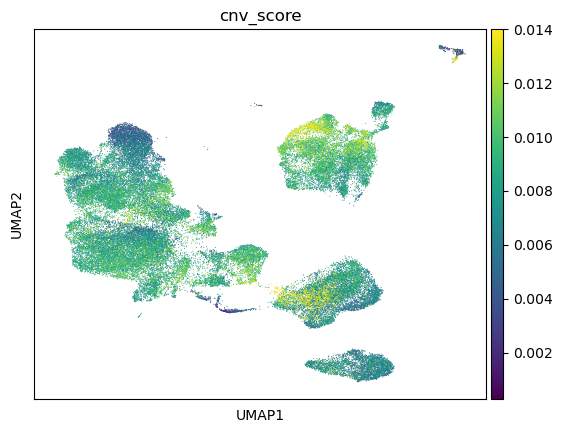

In [30]:
sc.pl.umap(adata_normal_cancer, color='cnv_score',vmax=0.014, vmin=None, save='_XY_cnv_score_normal_cancer.pdf')

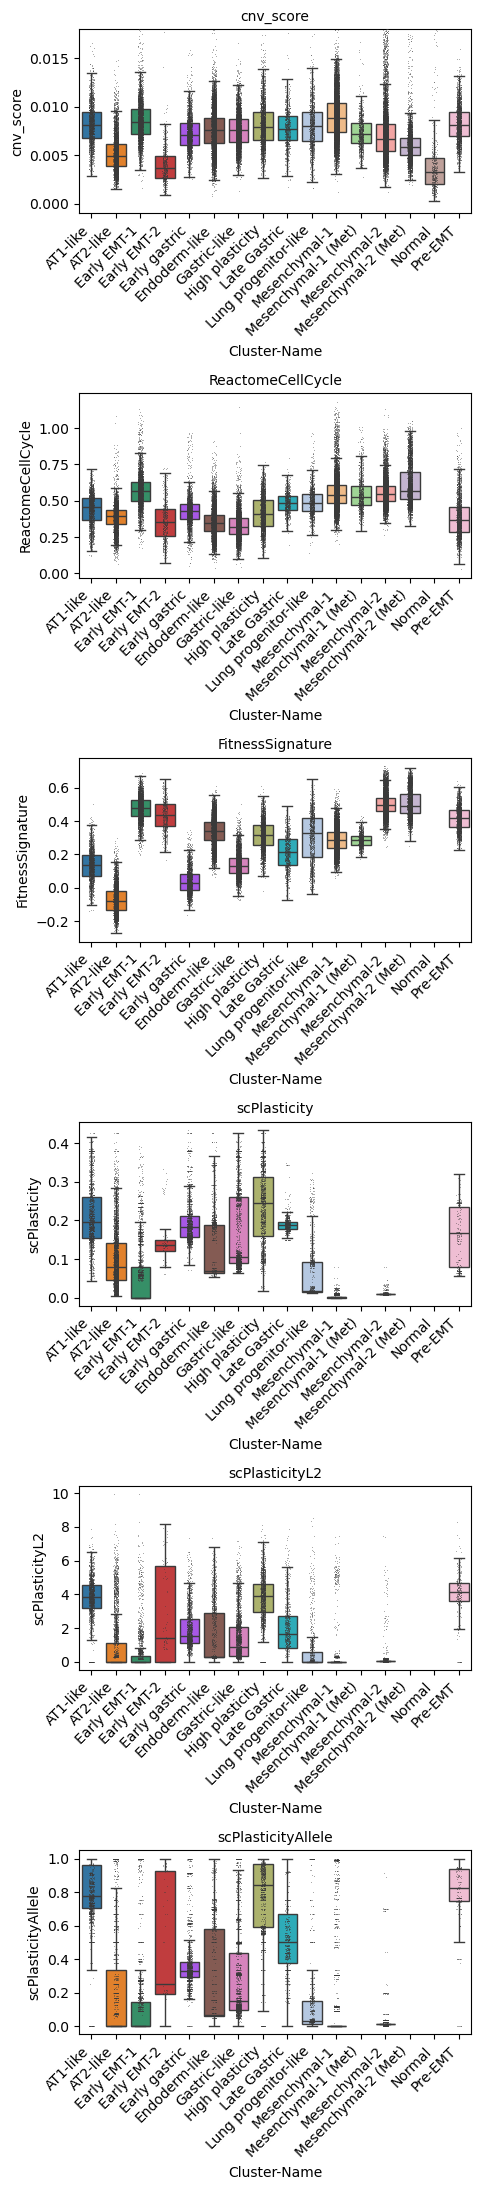

In [113]:
sorted_time = ['AT1-like', 'AT2-like', 'Early EMT-1', 'Early EMT-2', 'Early gastric', 'Endoderm-like', 
               'Gastric-like', 'High plasticity', 'Late Gastric', 'Lung progenitor-like',
               'Mesenchymal-1', 'Mesenchymal-1 (Met)', 'Mesenchymal-2', 'Mesenchymal-2 (Met)', 
               'Normal', 'Pre-EMT', ]

obs_time = 'Cluster-Name'
time_colors = dict(zip(sorted_time, adata_normal_cancer.uns['{}_colors'.format(obs_time)]))

fontsize = 10

f, axes = plt.subplots(6, 1, figsize=(5, 22))

keys = ['cnv_score', 'ReactomeCellCycle', 'FitnessSignature', 'scPlasticity', 'scPlasticityL2', 'scPlasticityAllele']

n = 0
for key in keys:
    sns.boxplot(x=obs_time, y=key, data=adata_normal_cancer.obs, palette=time_colors, ax=axes[n], showfliers=False)
    sns.stripplot(x=obs_time, y=key, data=adata_normal_cancer.obs, size=0.4, color=".3", linewidth=0, ax=axes[n])
    n += 1
    
for ax in axes:
    ax.set_xlabel(obs_time, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)

axes[0].set_ylim(-0.001, 0.018) 
#axes[0].set_ylabel('Pseudotime', fontsize=fontsize)
#axes[1].set_ylabel('')
#axes[2].set_ylabel('')

#axes[1].set_yticklabels([])
#axes[2].set_yticklabels([])
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)
for n in range(len(keys)):
    axes[n].set_title(keys[n], fontsize=fontsize)

plt.tight_layout()
plt.savefig('figures/boxplot_normal_cancer.pdf')
plt.show()